In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [8]:
dato = pd.DataFrame(pd.read_csv('./car_detailsv4_1.csv'))

In [9]:
dato.head()

,Make,Model,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [10]:
dato.shape

(2059, 20)

In [11]:
dato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel_Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller_Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max_Power           1979 non-null   object 
 13  Max_Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [13]:
dato.corr()

ValueError: could not convert string to float: 'Honda'

In [29]:
dato.isnull().sum()*100/dato.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                4.067245
Max Power             4.067245
Max Torque            4.067245
Drivetrain            7.104121
Length                3.199566
Width                 3.199566
Height                3.199566
Seating Capacity      3.199566
Fuel Tank Capacity    5.206074
dtype: float64

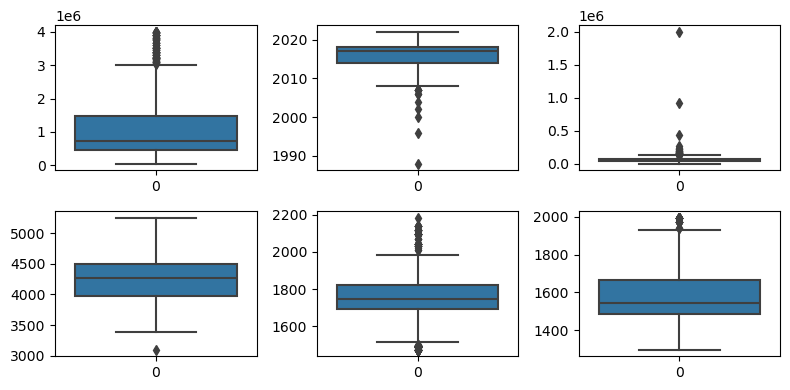

In [30]:
fig, axs = plt.subplots(2,3, figsize = (8,4))
plt1 = sns.boxplot(dato['Price'], ax = axs[0,0])
plt2 = sns.boxplot(dato['Year'], ax = axs[0,1])
plt3 = sns.boxplot(dato['Kilometer'], ax = axs[0,2])
plt1 = sns.boxplot(dato['Length'], ax = axs[1,0])
plt2 = sns.boxplot(dato['Width'], ax = axs[1,1])
plt3 = sns.boxplot(dato['Height'], ax = axs[1,2])

plt.tight_layout()


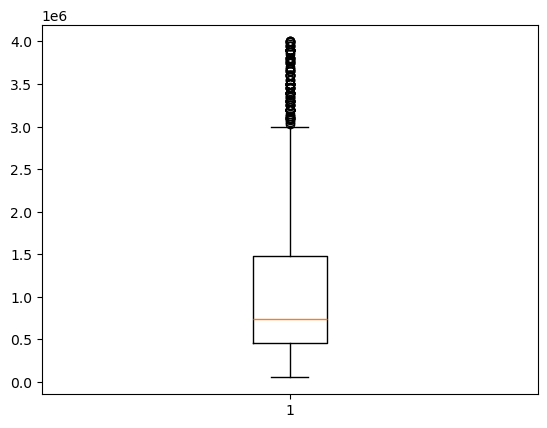

In [31]:
plt.boxplot(dato.Price)
Q1 = dato.Price.quantile(0.25)
Q3 = dato.Price.quantile(0.75)
IQR = Q3 - Q1
dato = dato[(dato.Price >= Q1 - 1.5*IQR) & (dato.Price <= Q3 + 1.5*IQR)]

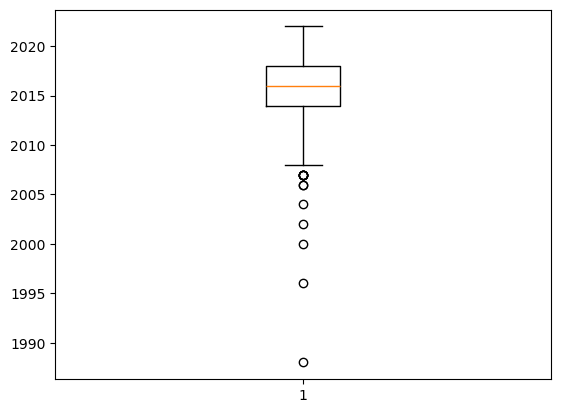

In [32]:
plt.boxplot(dato.Year)
Q1 = dato.Year.quantile(0.25)
Q3 = dato.Year.quantile(0.75)
IQR = Q3 - Q1
dato = dato[(dato.Year >= Q1 - 1.5*IQR) & (dato.Year <= Q3 + 1.5*IQR)]

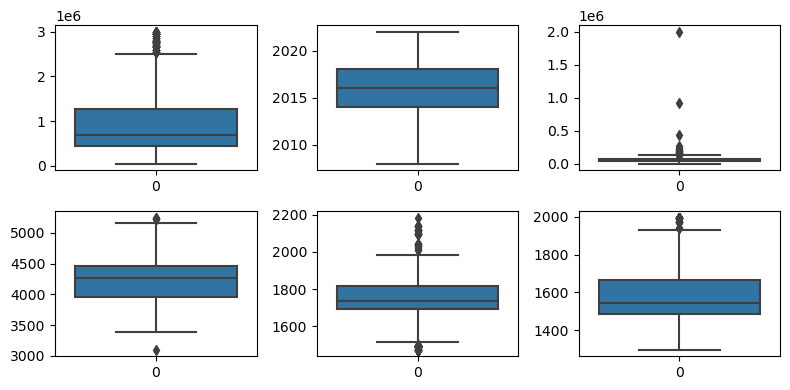

In [33]:
fig, axs = plt.subplots(2,3, figsize = (8,4))
plt1 = sns.boxplot(dato['Price'], ax = axs[0,0])
plt2 = sns.boxplot(dato['Year'], ax = axs[0,1])
plt3 = sns.boxplot(dato['Kilometer'], ax = axs[0,2])
plt1 = sns.boxplot(dato['Length'], ax = axs[1,0])
plt2 = sns.boxplot(dato['Width'], ax = axs[1,1])
plt3 = sns.boxplot(dato['Height'], ax = axs[1,2])

plt.tight_layout()

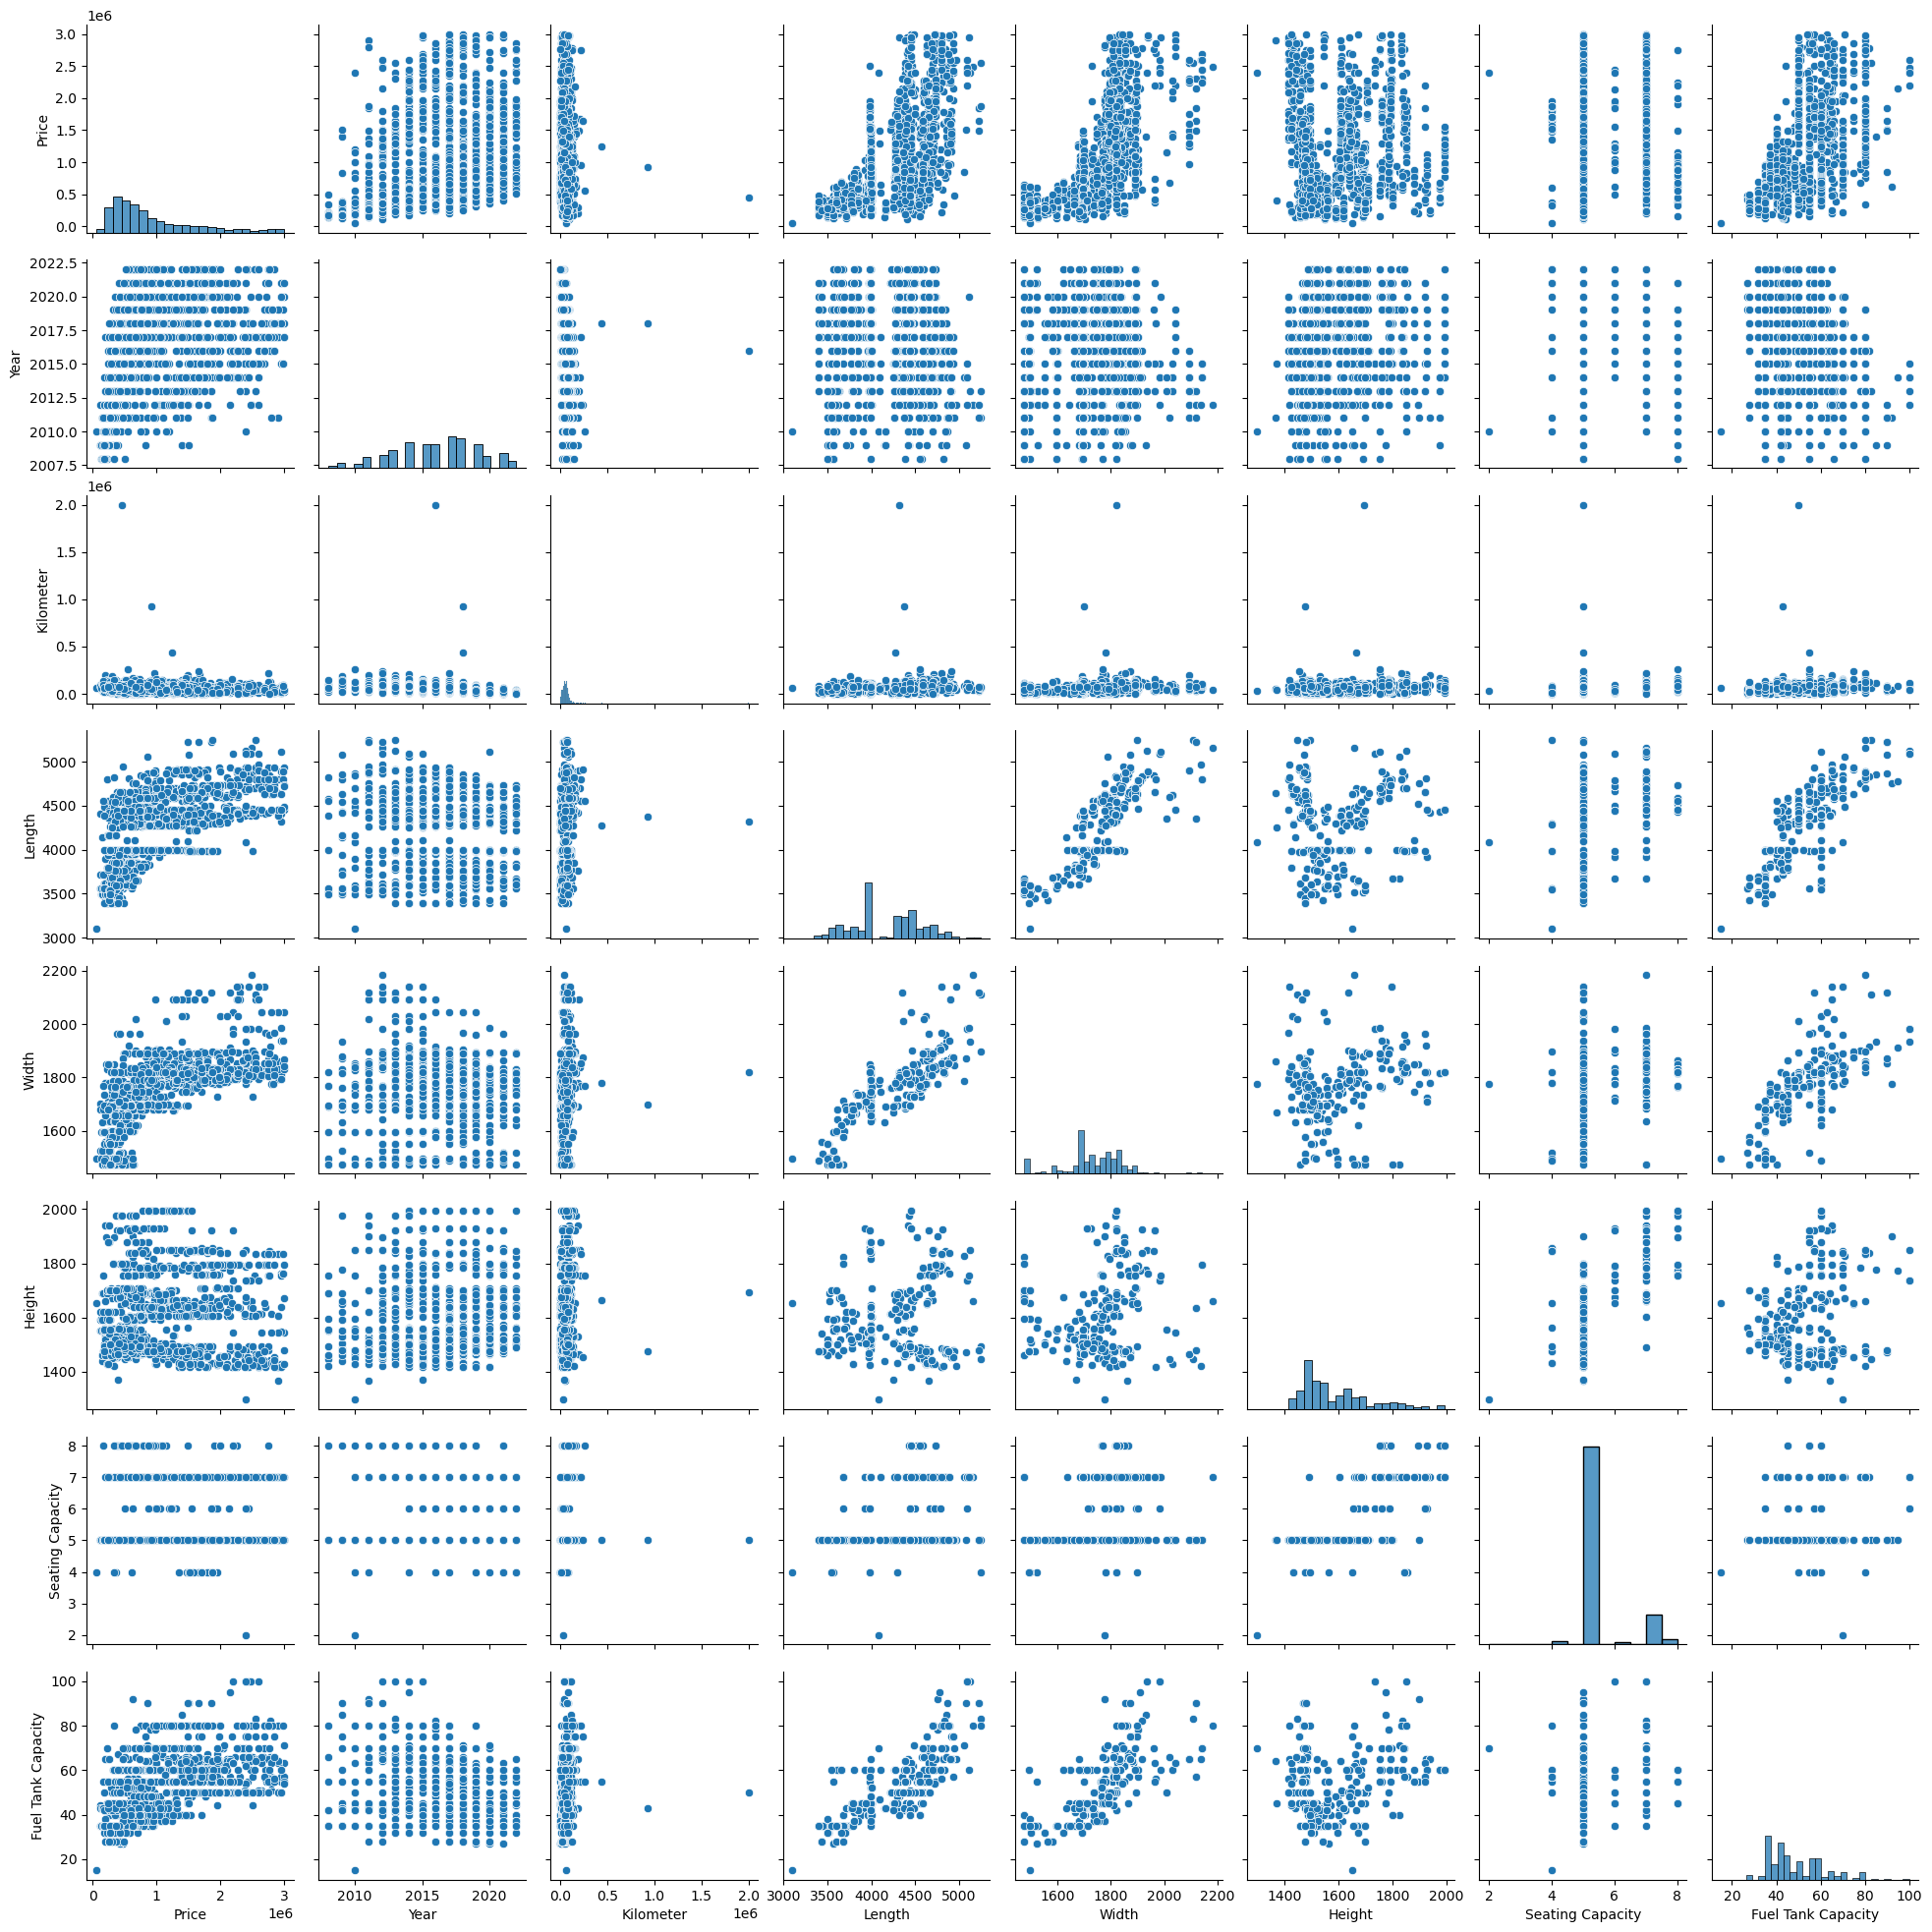

In [34]:
sns.pairplot(dato)
plt.show()

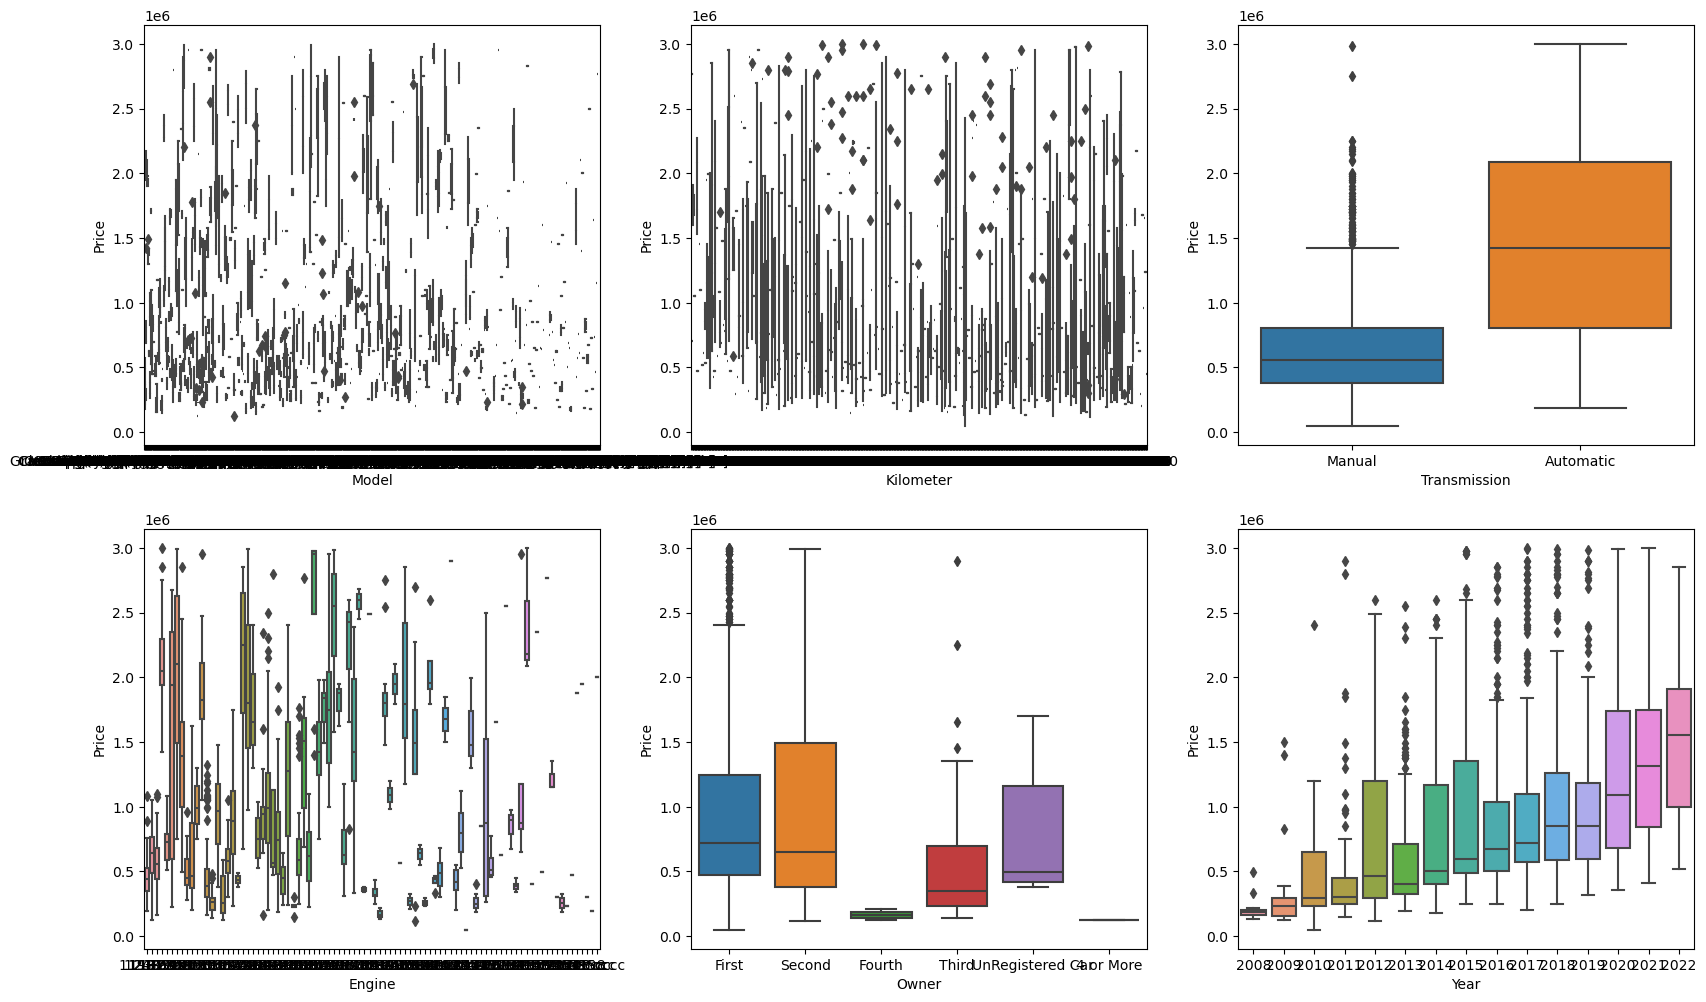

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Model', y = 'Price', data = dato)
plt.subplot(2,3,2)
sns.boxplot(x = 'Kilometer', y = 'Price', data = dato)
plt.subplot(2,3,3)
sns.boxplot(x = 'Transmission', y = 'Price', data = dato)
plt.subplot(2,3,4)
sns.boxplot(x = 'Engine', y = 'Price', data = dato)
plt.subplot(2,3,5)
sns.boxplot(x = 'Owner', y = 'Price', data = dato)
plt.subplot(2,3,6)
sns.boxplot(x = 'Year', y = 'Price', data = dato)
plt.show()

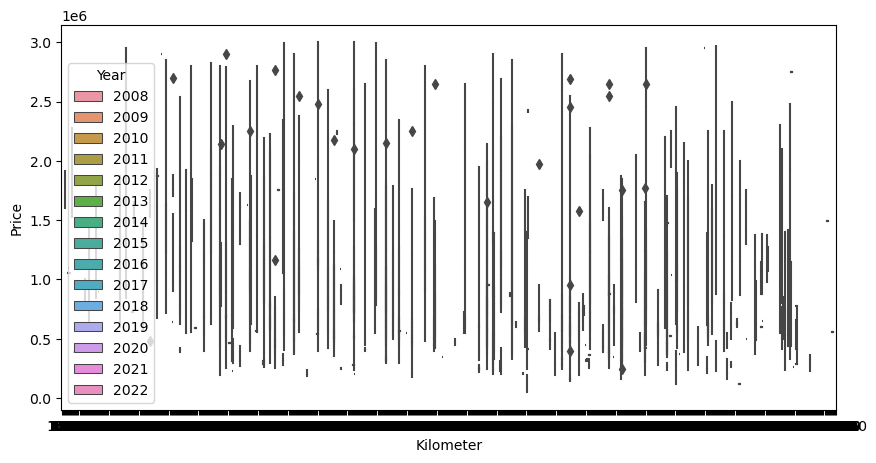

In [40]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Kilometer', y = 'Price', hue = 'Year', data = dato)
plt.show()

In [76]:
varlist =  ['Transmision', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

KeyError: "['Owner'] not in index"

In [69]:
dato.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Seller Type,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,First,Fourth,Second,Third,UnRegistered Car
0,Honda,NaN,505000,NaN,NaN,Petrol,Manual,Pune,Grey,Corporate,...,NaN,NaN,NaN,5.0,35.0,True,False,False,False,False
1,Maruti Suzuki,NaN,450000,NaN,NaN,Diesel,Manual,Ludhiana,White,Individual,...,NaN,NaN,NaN,5.0,42.0,False,False,True,False,False
2,Hyundai,NaN,220000,NaN,NaN,Petrol,Manual,Lucknow,Maroon,Individual,...,NaN,NaN,NaN,5.0,35.0,True,False,False,False,False
3,Toyota,NaN,799000,NaN,NaN,Petrol,Manual,Mangalore,Red,Individual,...,NaN,NaN,NaN,5.0,37.0,True,False,False,False,False
4,Toyota,NaN,1950000,NaN,NaN,Diesel,Manual,Mumbai,Grey,Individual,...,NaN,NaN,NaN,7.0,55.0,True,False,False,False,False


In [71]:
status = pd.get_dummies(dato['Owner'])

KeyError: 'Owner'

In [66]:
status.head()

,Automatic,Manual
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [51]:
status = pd.get_dummies(dato['Owner'], drop_first = True)

In [54]:
dato = pd.concat([dato, status], axis = 1)

In [55]:
dato.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,First,Fourth,Second,Third,UnRegistered Car
0,Honda,NaN,505000,NaN,NaN,Petrol,Manual,Pune,Grey,First,...,NaN,NaN,NaN,5.0,35.0,True,False,False,False,False
1,Maruti Suzuki,NaN,450000,NaN,NaN,Diesel,Manual,Ludhiana,White,Second,...,NaN,NaN,NaN,5.0,42.0,False,False,True,False,False
2,Hyundai,NaN,220000,NaN,NaN,Petrol,Manual,Lucknow,Maroon,First,...,NaN,NaN,NaN,5.0,35.0,True,False,False,False,False
3,Toyota,NaN,799000,NaN,NaN,Petrol,Manual,Mangalore,Red,First,...,NaN,NaN,NaN,5.0,37.0,True,False,False,False,False
4,Toyota,NaN,1950000,NaN,NaN,Diesel,Manual,Mumbai,Grey,First,...,NaN,NaN,NaN,7.0,55.0,True,False,False,False,False


In [56]:
dato.drop(['Owner'], axis = 1, inplace = True)

In [57]:
dato.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Seller Type,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,First,Fourth,Second,Third,UnRegistered Car
0,Honda,NaN,505000,NaN,NaN,Petrol,Manual,Pune,Grey,Corporate,...,NaN,NaN,NaN,5.0,35.0,True,False,False,False,False
1,Maruti Suzuki,NaN,450000,NaN,NaN,Diesel,Manual,Ludhiana,White,Individual,...,NaN,NaN,NaN,5.0,42.0,False,False,True,False,False
2,Hyundai,NaN,220000,NaN,NaN,Petrol,Manual,Lucknow,Maroon,Individual,...,NaN,NaN,NaN,5.0,35.0,True,False,False,False,False
3,Toyota,NaN,799000,NaN,NaN,Petrol,Manual,Mangalore,Red,Individual,...,NaN,NaN,NaN,5.0,37.0,True,False,False,False,False
4,Toyota,NaN,1950000,NaN,NaN,Diesel,Manual,Mumbai,Grey,Individual,...,NaN,NaN,NaN,7.0,55.0,True,False,False,False,False


In [61]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(dato, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [64]:
num_vars = ['Year', 'Kilometerr', 'Length', 'Width', 'Height','Price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

KeyError: "['Kilometerr'] not in index"